In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cre = pd.read_csv("data/CRE.csv")
cre = cre.set_index("time-axis")
cre.head()

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
time-axis,,,,,,,,,,,,,,,,,,,,,
1.502417,0.118759,0.123264,0.083951,0.066779,0.074803,0.101895,-0.062284,0.023330,-0.003928,-0.054570,...,-0.142735,0.042087,-0.100365,-0.085919,0.034313,-0.071670,-0.085267,-0.042458,-0.030357,0.004442
1.506434,0.119821,0.122843,0.087509,0.068563,0.074770,0.103066,-0.061812,0.025096,-0.005223,-0.055310,...,-0.141056,0.043778,-0.101317,-0.084526,0.034008,-0.069758,-0.082976,-0.044487,-0.030915,0.001585
1.510451,0.120869,0.122364,0.091627,0.070088,0.074734,0.104241,-0.061351,0.026953,-0.006480,-0.056034,...,-0.139222,0.045368,-0.102179,-0.083213,0.033680,-0.067819,-0.080722,-0.046448,-0.031561,-0.001392
1.514468,0.121902,0.121823,0.095635,0.071368,0.074697,0.105417,-0.060901,0.028887,-0.007696,-0.056740,...,-0.137256,0.046836,-0.102938,-0.082004,0.033358,-0.065860,-0.078511,-0.048340,-0.032301,-0.004441
1.518485,0.122920,0.121216,0.097615,0.072421,0.074657,0.106594,-0.060461,0.030883,-0.008870,-0.057426,...,-0.135190,0.048160,-0.103575,-0.080918,0.033031,-0.063885,-0.076340,-0.050163,-0.033138,-0.007519


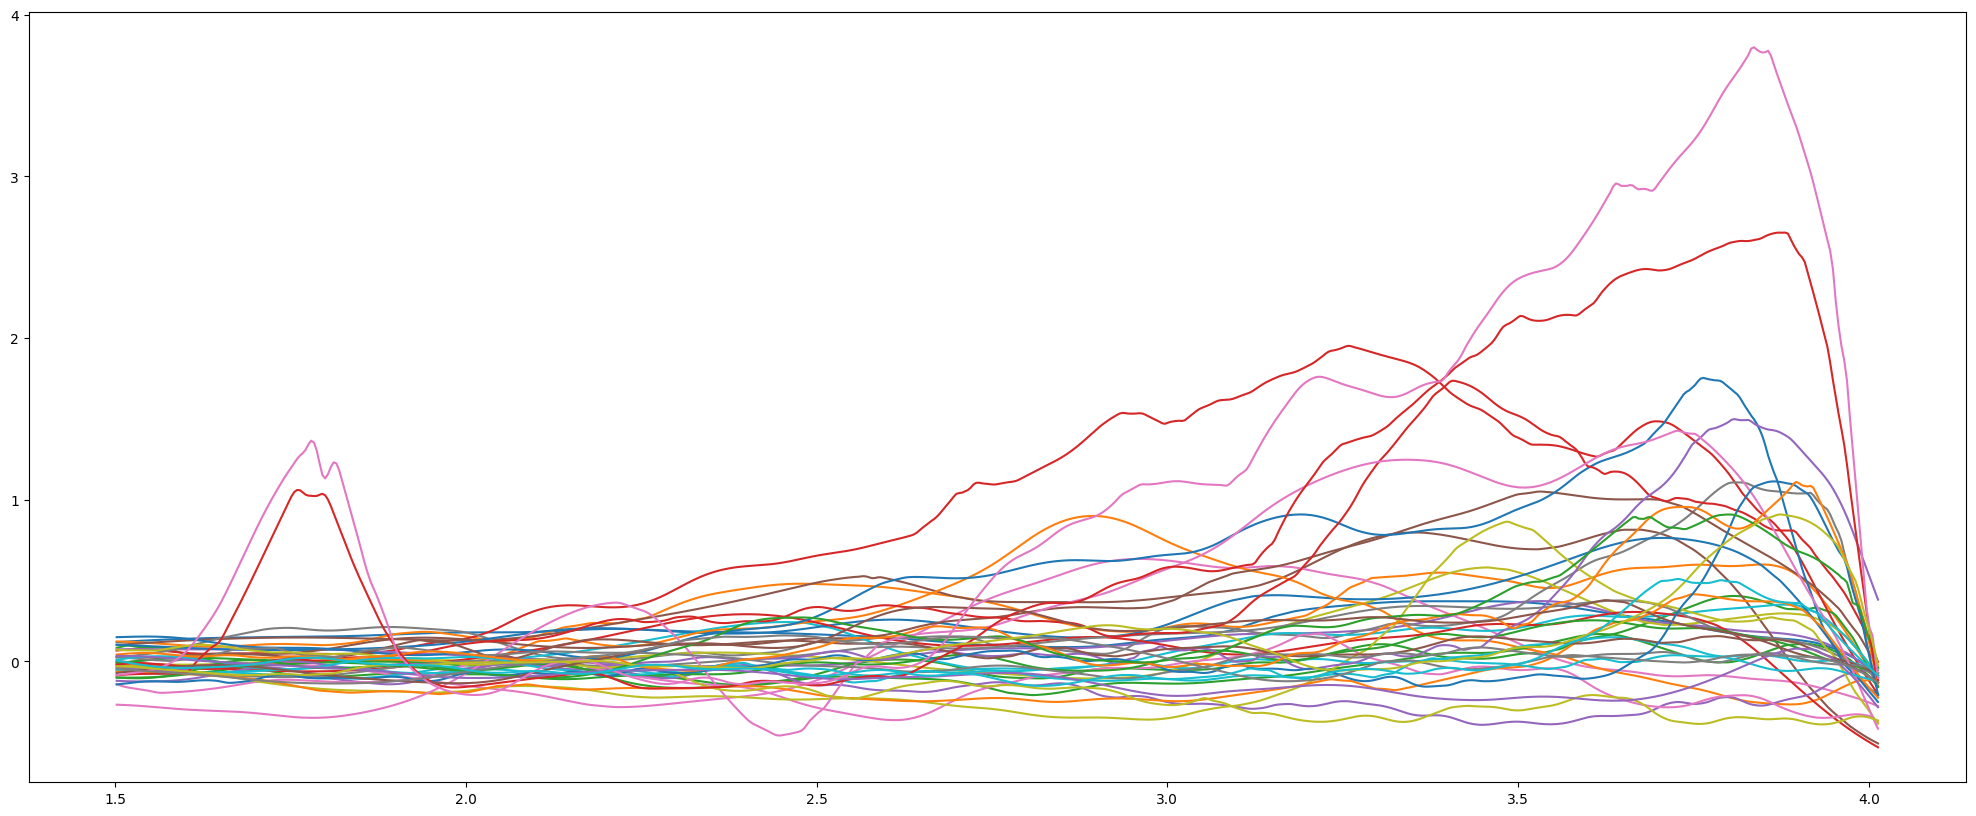

In [3]:
plt.figure(figsize=(25,10))
plt.plot(cre)
plt.show()

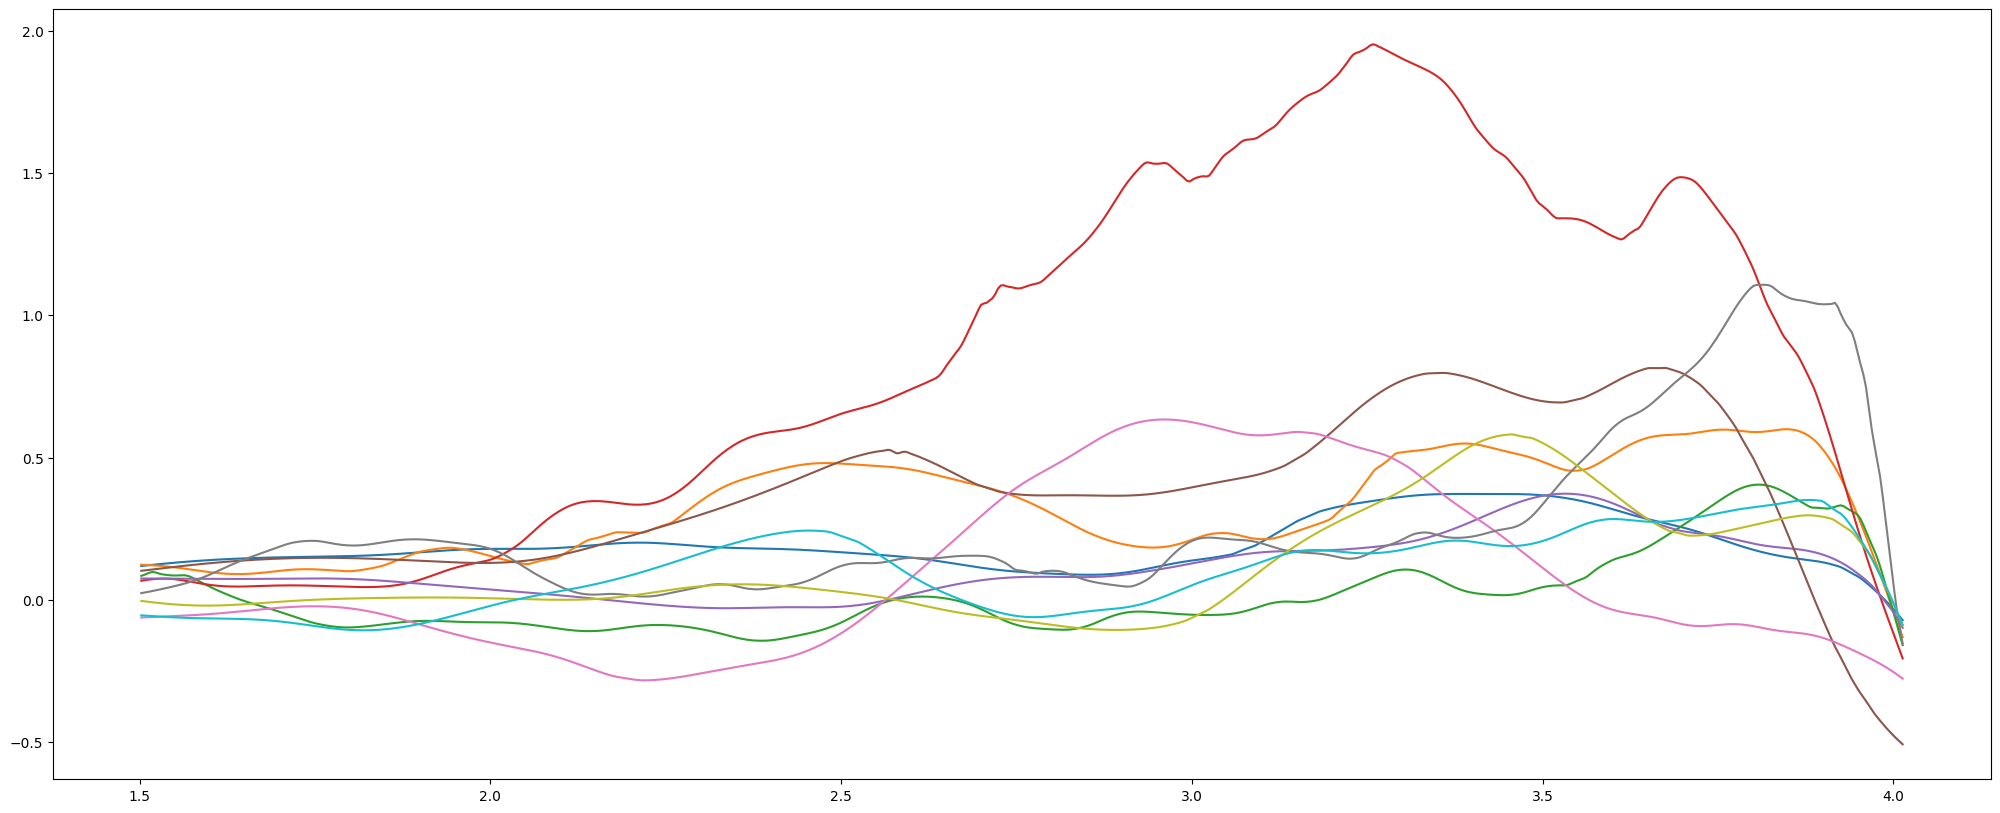

In [4]:
plt.figure(figsize=(25,10))
plt.plot(cre[cre.columns[0:10]])
plt.show()


In [39]:
# Augmented Dickey-Fuller Test

import pandas as pd
from statsmodels.tsa.stattools import adfuller

results = []
for col in cre.columns:
    result = adfuller(cre[col])
    results.append(result[1])
    print(f"{col}: ADF={result[0]:.4f}, p-value={result[1]:.4f}")

print(np.array(results).mean())
print(np.array(results).std())


1: ADF=-1.2107, p-value=0.6690
2: ADF=-2.3523, p-value=0.1557
3: ADF=-3.6607, p-value=0.0047
4: ADF=-1.5895, p-value=0.4889
5: ADF=-1.1598, p-value=0.6906
6: ADF=-1.1044, p-value=0.7133
7: ADF=-1.5214, p-value=0.5229
8: ADF=-3.5189, p-value=0.0075
9: ADF=-1.2011, p-value=0.6731
10: ADF=-2.8163, p-value=0.0560
11: ADF=-2.5017, p-value=0.1150
12: ADF=-1.9753, p-value=0.2975
13: ADF=-1.2203, p-value=0.6648
14: ADF=-3.4908, p-value=0.0082
15: ADF=-1.4531, p-value=0.5566
16: ADF=-1.6348, p-value=0.4650
17: ADF=-1.2637, p-value=0.6456
18: ADF=-2.5731, p-value=0.0987
19: ADF=-1.6233, p-value=0.4710
20: ADF=-2.1151, p-value=0.2385
21: ADF=-2.6261, p-value=0.0877
22: ADF=-4.4286, p-value=0.0003
23: ADF=-1.4227, p-value=0.5714
24: ADF=-2.4470, p-value=0.1289
25: ADF=-5.0991, p-value=0.0000
26: ADF=-1.3392, p-value=0.6110
27: ADF=-1.7092, p-value=0.4264
28: ADF=-1.2034, p-value=0.6721
29: ADF=-1.2027, p-value=0.6724
30: ADF=-3.0927, p-value=0.0271
31: ADF=-5.6541, p-value=0.0000
32: ADF=-1.8822, 

Identifying the best lag for 

In [3]:
from models.utils import *
df = pd.read_csv('data/CRE.csv')
series_cols = [col for col in df.columns if col != 'time-axis']
data = df[series_cols].values
X, y, series_ids = create_sliding_windows(data, window=25, horizon=1)
(X_train, y_train), (X_test, y_test) = train_test_split(X, y, series_ids)


In [ ]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")
warnings.filterwarnings("ignore", category=RuntimeWarning, module="statsmodels")

def find_best_ar_lag(series, max_lag=40):
    best_aic = float('inf')
    best_aic_lag = 0
    best_bic = float('inf')
    best_bic_lag = 0

    for lag in range(1, max_lag + 1):
        try:
            if len(series) > lag:
                model = AutoReg(series, lags=lag)
                model_fit = model.fit()
                if model_fit.aic < best_aic:
                    best_aic = model_fit.aic
                    best_aic_lag = lag
                if model_fit.bic < best_bic:
                    best_bic = model_fit.bic
                    best_bic_lag = lag
        except Exception as e:
            # print(f"Could not fit AR({lag}): {e}") # Optional: for debugging
            continue
    return best_aic_lag, best_bic_lag

if __name__ == "__main__":
    df = pd.read_csv('data/CRE.csv')

    series_name = [col for col in df.columns if col != 'time-axis'][0]
    time_series = df[series_name]

    print(f"Analyzing series: {series_name}")

    best_aic_lag, best_bic_lag = find_best_ar_lag(time_series)
    print(f"\nBest AR lag for {series_name} based on AIC: {best_aic_lag}")
    print(f"Best AR lag for {series_name} based on BIC: {best_bic_lag}")

In [ ]:
cre.shape

Testing new windowing

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings("ignore")
def create_sliced_dataset(file_path, window_size=50):
    df = pd.read_csv(file_path)

    all_slices = []
    
    for col in df.columns:
        series = df[col].values

        for i in range(len(series) - window_size + 1):
            window = series[i : i + window_size]
            all_slices.append(window)
        
    # sliced_df = pd.concat(all_slices, axis=0)
    # print(np.array([len(x) for x in all_slices]).mean())


    # return sliced_df

a = create_sliced_dataset('data/CRE.csv', 25)
print(a)


25.0
None


In [ ]:
a.shapek

(602, 1025)